### Context
Using a Columbia Business School dataset on surveys filled out by people who attended speed dating events between 2002 and 2004, this project aims to answer the following questions:
- what is the likelihood of having at least one "match" when attending these events? A match is when two people who have meet each other during the event agree to exchange contact numbers and possibility meet again.
- does the order of people met impact the likelihood of having a match?
- does previous date experience lead to more success (more matches?)
- does perceived self-esteem have an impact on the results?



In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy import stats
from scipy.stats import geom
import seaborn as sns

In [8]:
ds = pd.read_csv("/Users/ana/ironhack_coding/projects/Date Speed Insights/dataset/speed_dating_data.csv", encoding = "Latin 1")

FileNotFoundError: [Errno 2] File b'/Users/ana/ironhack_coding/projects/Date Speed Insights/dataset/speed_dating_data.csv' does not exist: b'/Users/ana/ironhack_coding/projects/Date Speed Insights/dataset/speed_dating_data.csv'

In [12]:
ds.head()


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [13]:
# all columns
print(ds.columns.values)

['iid' 'id' 'gender' 'idg' 'condtn' 'wave' 'round' 'position' 'positin1'
 'order' 'partner' 'pid' 'match' 'int_corr' 'samerace' 'age_o' 'race_o'
 'pf_o_att' 'pf_o_sin' 'pf_o_int' 'pf_o_fun' 'pf_o_amb' 'pf_o_sha' 'dec_o'
 'attr_o' 'sinc_o' 'intel_o' 'fun_o' 'amb_o' 'shar_o' 'like_o' 'prob_o'
 'met_o' 'age' 'field' 'field_cd' 'undergra' 'mn_sat' 'tuition' 'race'
 'imprace' 'imprelig' 'from' 'zipcode' 'income' 'goal' 'date' 'go_out'
 'career' 'career_c' 'sports' 'tvsports' 'exercise' 'dining' 'museums'
 'art' 'hiking' 'gaming' 'clubbing' 'reading' 'tv' 'theater' 'movies'
 'concerts' 'music' 'shopping' 'yoga' 'exphappy' 'expnum' 'attr1_1'
 'sinc1_1' 'intel1_1' 'fun1_1' 'amb1_1' 'shar1_1' 'attr4_1' 'sinc4_1'
 'intel4_1' 'fun4_1' 'amb4_1' 'shar4_1' 'attr2_1' 'sinc2_1' 'intel2_1'
 'fun2_1' 'amb2_1' 'shar2_1' 'attr3_1' 'sinc3_1' 'fun3_1' 'intel3_1'
 'amb3_1' 'attr5_1' 'sinc5_1' 'intel5_1' 'fun5_1' 'amb5_1' 'dec' 'attr'
 'sinc' 'intel' 'fun' 'amb' 'shar' 'like' 'prob' 'met' 'match_es'
 'attr1_s

In [14]:
# selecting only relevant columns for this analysis 
ds = ds[["iid","gender","round", "order", "match", "date", "attr5_1","sinc5_1","intel5_1","fun5_1","amb5_1"]]

# changing column names


ds.columns =  ["participant_id","gender","people_met","order", "match", "date_freq","self_attractive","self_sincere","self_intelligent","self_fun","self_ambitious"]

ds.head()

,participant_id,gender,people_met,order,match,int_corr,date_freq,self_attractive,self_sincere,self_intelligent,self_fun,self_ambitious
0,1,0,10,4,0,0.14,7.0,NaN,NaN,NaN,NaN,NaN
1,1,0,10,3,0,0.54,7.0,NaN,NaN,NaN,NaN,NaN
2,1,0,10,10,1,0.16,7.0,NaN,NaN,NaN,NaN,NaN
3,1,0,10,5,1,0.61,7.0,NaN,NaN,NaN,NaN,NaN
4,1,0,10,7,1,0.21,7.0,NaN,NaN,NaN,NaN,NaN


In [15]:
ds.shape

(8378, 12)

In [17]:
# checking null values
ds.isnull().sum()

participant_id         0
gender                 0
people_met             0
order                  0
match                  0
int_corr             158
date_freq             97
self_attractive     3472
self_sincere        3472
self_intelligent    3472
self_fun            3472
self_ambitious      3472
dtype: int64

The "self" columns have a high number of NaN values, these will not be removed now. The analysis of whether these attributes influence the outcome will be done with the data available.

## Question 1 
### What is the likelihood of having at least one match during a speed dating event? 

In [19]:
# Calculating how many matches each participant had

match_no = pd.pivot_table(ds, index = "participant_id", values = "match", aggfunc = np.sum)

match_no.head()


,match
participant_id,
1,4
2,2
3,0
4,2
5,2


#### Likelihood of finding at least a match when participating in a datespeeding event

In [21]:
match_no["match"].value_counts(normalize = True).reset_index().sort_values(by = 'index')#.plot(x = 'index', y = 'match')

,index,match
2,0,0.179673
0,1,0.226860
1,2,0.212341
3,3,0.116152
4,4,0.081670
5,5,0.070780
6,6,0.043557
8,7,0.023593
7,8,0.030853
9,9,0.005445


#### Probability of getting at least one match

In [26]:
# calculating probability
total = len(match_no)
with_match = total - 99

result = round(with_match / total,2) 


### Question 1 - Answer

In [30]:
print("The probability of getting at least on match during a speed dating event is of: ", result * 100 , "%")

The probability of getting at least on match during a speed dating event is of:  82.0 %


## Question 2
### Does the order of people met impact the likelihood of having a match?

First, let's understand how many people usually attend these type of events and use this number as our sample

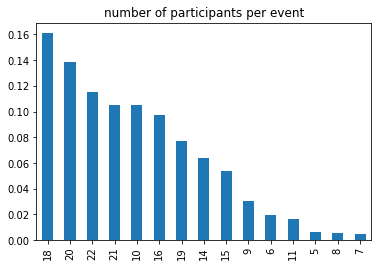

In [50]:
ds["people_met"].value_counts(normalize=True).plot(kind="bar", title = "number of participants per event")
plt.show()

Most events have 18 participants in total.

In [58]:
# select instances where there was a match (== 1) and the event had 18 participants in total

order = ds.loc[ds[(ds.match == 1) & (ds.people_met == 18)].groupby('participant_id')['order'].idxmin()]["order"].value_counts(normalize = True).reset_index()
order = order.rename(columns={"index":"person_number", "order":"percentage"})

order



,person_number,percentage
0,1,0.333333
1,7,0.130435
2,3,0.086957
3,2,0.086957
4,6,0.072464
5,4,0.072464
6,9,0.057971
7,18,0.043478
8,5,0.043478
9,13,0.028986


Some numbers(person number) are missing. New numbers will be added in order to proceed with the analysis

In [60]:
to_add = [11, 12, 14, 16, 17]
for i,j in enumerate(to_add):
    order.loc[i+13] = [j, 0]

In [63]:
order_sorted = order.sort_values("person_number").reset_index(drop=True)
order_sorted

,person_number,percentage
0,1,0.333333
1,2,0.086957
2,3,0.086957
3,4,0.072464
4,5,0.043478
5,6,0.072464
6,7,0.130435
7,8,0.014493
8,9,0.057971
9,10,0.014493


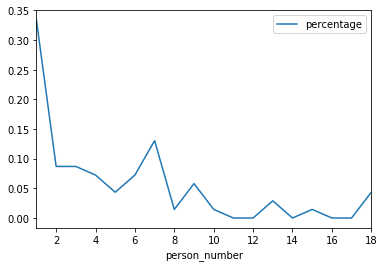

In [65]:
order_sorted.plot(x='person_number', y='percentage')
plt.show()

It looks like the first and 7th person met in one of these events are more likely to cause a good impression, e.g. be matched with someone else. However, let's confirm this

#### Chi Square

In [67]:
# values for expected values for chi square
x = geom(np.mean(order_sorted.percentage)) 
expected_values = x.pmf(range(0,18))
print(expected_values)

[0.         0.05555556 0.05246914 0.04955418 0.04680117 0.04420111
 0.04174549 0.0394263  0.03723595 0.03516728 0.03321355 0.03136835
 0.02962566 0.02797979 0.02642536 0.02495728 0.02357077 0.02226128]


In [68]:
# observed values for chi square
observed_values = np.array(order_sorted["percentage"])
observed_values

array([0.33333333, 0.08695652, 0.08695652, 0.07246377, 0.04347826,
       0.07246377, 0.13043478, 0.01449275, 0.05797101, 0.01449275,
       0.        , 0.        , 0.02898551, 0.        , 0.01449275,
       0.        , 0.        , 0.04347826])

In [69]:
print(len(observed_values))
print(len(expected_values))

18
18


In [70]:
from scipy.stats import chi2
chi = sum((observed_values - expected_values)**2 / expected_values) 
dof = 98 #degree of freedom, n -1
alpha = 0.05


critical_value = chi2.ppf(q = 1 - alpha, df = dof)   # ppf: Percent Point Function
print("Null hypothesis rejected") if critical_value < chi else print("Null hypothesis can't be rejected")

Null hypothesis rejected


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


### Question 2 - Answer
We have used a sample to see if the order of the people met would have any impact on the likelihood of being match. Although the sample shows that the 1st and 7th person met are more likely to be successful and get a match, unfortunately, this can't be extended to the population. More data would be necessary.

## Question 1 
### Does previous date experience lead to more success (more matches?)

Codebook

How frequently do you go on dates ?
- Several times a week (1)
- Twice a week (2)
- Once a week (3)
- Twice a month (4)
- Once a month (5)
- Several times a year (6)
- Almost never (7)

In [73]:
date_freq_match = pd.pivot_table(ds, index = "date_freq", values = ["match"], aggfunc = {"match":np.sum}).reset_index()

date_freq_match.corr()

,date_freq,match
date_freq,1.000000,0.698577
match,0.698577,1.000000


In [74]:
X = date_freq_match['date_freq']
Y = date_freq_match['match']
slope, intercept, r_value, _, std_err = stats.linregress(X, Y) 
slope

38.9642857142857

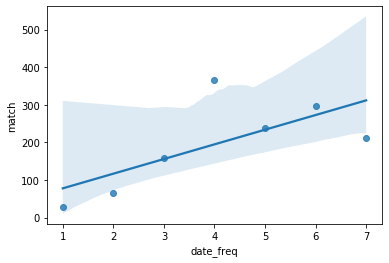

In [77]:
sns.regplot(x="date_freq", y="match", data = date_freq_match)

In [85]:
100- slope


61.0357142857143

In [87]:
0.61 ** 2

0.3721

### Question 3 - Answer

The dating frequency of the attendants influences 37% of the likelihood of being matched.
There is some correlation between dating experience and success in a speed dating event

## Question 4
### Does perceived self-esteem have an impact on the results?

In [89]:
self_confidence = pd.pivot_table(ds, index = "participant_id", values = ["match","self_attractive","self_sincere",
                                                                   "self_intelligent", "self_fun","self_ambitious"],
                                                                   aggfunc = {"match": np.sum, 
                                                                              "self_attractive":np.mean,
                                                                             "self_sincere": np.mean, 
                                                                              "self_intelligent":np.mean,
                                                                             "self_fun":np.mean,
                                                                             "self_ambitious":np.mean})

# drop Nan Values of certain rows

print(len(self_confidence))
self_confidence.dropna(axis = 0, how="any", inplace = True)
print(len(self_confidence))

# filter with match and no match

confidence_with_match = self_confidence[(self_confidence.match >= 1)]
confidence_without_match = self_confidence[(self_confidence.match == 0)]

# summing all rows but number of match

confidence_with_match["self_confidence_points"] = confidence_with_match.iloc[:,1:].sum(axis=1)
confidence_without_match["self_confidence_points"] = confidence_without_match.iloc[:,1:].sum(axis=1)

551
314


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### Confidence correlation of attendants who were matched

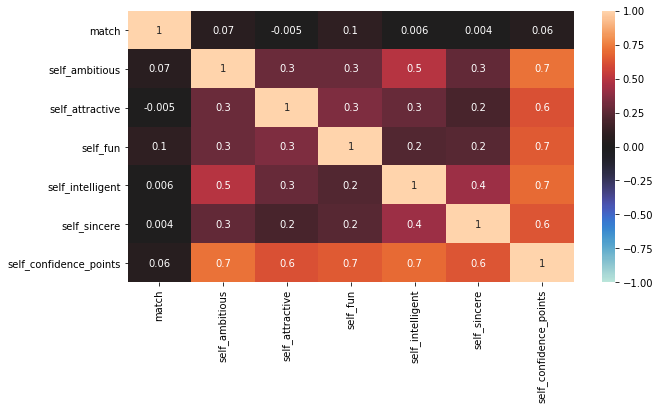

In [103]:
plt.figure(figsize=(10,5))
ax = sns.heatmap(confidence_with_match.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

#### Confidence correlation of attendants who were not matched


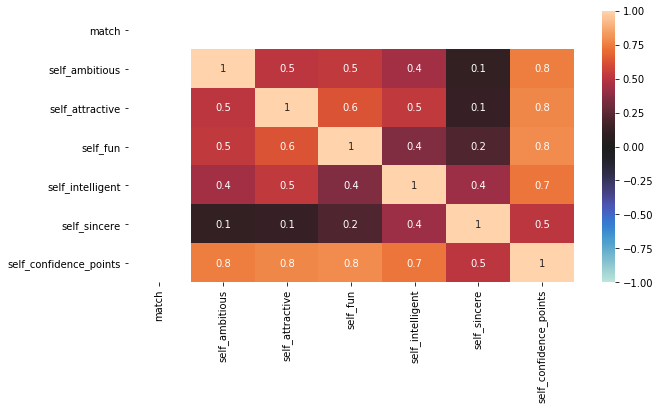

In [104]:
plt.figure(figsize=(10,5))
ax = sns.heatmap(confidence_without_match.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [92]:
confidence_with_match["self_confidence_points"].mean()

38.219607843137254

In [93]:
confidence_without_match["self_confidence_points"].mean()

37.6271186440678

#### Calculating T test for independent variables

In [107]:
# checking lenghts for t test
print("lenght", len(confidence_with_match))
print("lenght", len(confidence_without_match))

# get sample with 59 rows for t test (or could drop ramdomly)
sample = confidence_with_match.sample(59)

# null hypothesis is that people whose self perception is good get the same 
# amount of matches that those who don't

alpha = 0.05
stat, p = ttest_ind(sample.match, confidence_without_match.match)#, #equal_var=False)



# interpret via p-value
if p > alpha:
    print('We cannot reject the null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')



lenght 255
lenght 59
Reject the null hypothesis that the means are equal.


In [109]:
p

4.88723847356753e-17

### Question 4 - Answer 

Evidence shows that we can reject the idea that self-esteem and success are not related.
In other words, confidence will have a positive impact on these type of dating events.